# PG AI - Advanced Deep Learning and Computer Vision

### Facial Recognition with Deep Learning in Keras Using CNN

#### Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

#### Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 20 people, 20 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.


#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

#### Loading the dataset

In [3]:
data =  np.load('ORL_faces.npz')
data

#### Exploring the files in the dataset

In [4]:
files = [file for file in data.files]
files

['testY', 'testX', 'trainX', 'trainY']

#### Splitting the dataset in Training and Test

In [5]:
X_train, y_train, X_test, y_test = data['trainX'], data['trainY'], data['testX'], data['testY']
print("Training: {}".format((X_train.shape,y_train.shape)))
print("Test: {}".format((X_test.shape,y_test.shape)))

Training: ((240, 10304), (240,))
Test: ((160, 10304), (160,))


#### Identifying the unique class labels for classification

In [6]:
len(np.unique(y_test))

20

#### EDA: To find the imbalance in the class labels

_The class labels are uniformly represented, hence there is no imbalance in the datase._

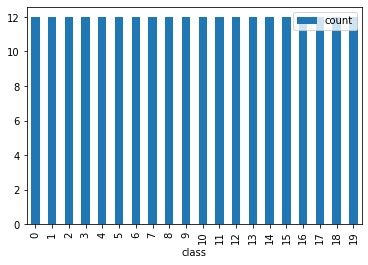

In [7]:
df = np.unique(y_train, return_counts=True)
df = pd.DataFrame({'class': df[0], 'count': df[1]})
df.plot(kind='bar', x='class', y=['count'])

#### EDA: Sampling Random Images from the Training set

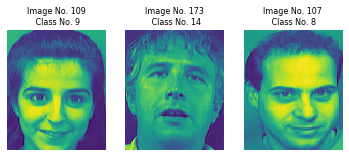

In [8]:
samples = np.random.randint(low=0, high=len(X_train)-1, size=3)

fig, axs = plt.subplots(1,3)
for ax, sample in zip(axs,samples):
    ax.imshow(X_train[sample].reshape(112,92))
    ax.set_title('Image No. {}\n Class No. {}'.format(sample, y_train[sample]), 
                 fontdict={'size': 8})
    ax.axis('off')

plt.show()

#### Normalizing/Scaling Images between 0 and 1

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Creating image shape to feed in the CNN

In [10]:
img_wt = 112
img_ht = 92

img_shape = (img_wt, img_ht, 1)

#### Importing required libraries to create the Neural Network with CNN and ANN

In [11]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense

#### Model Architechture:
1. Keras Sequential
2. Conv2D->MaxPool => 2 Layers
3. Flatten Layer
4. Hidden Dense Layer => 1 layer
5. Output Layer (Softmax)

In [17]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=img_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(128, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dropout(0.1)) 
model.add(Dense(20)) 
model.add(Activation('softmax')) 

#### Model summary

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 111, 91, 32)       160       
_________________________________________________________________
activation_6 (Activation)    (None, 111, 91, 32)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 44, 64)        8256      
_________________________________________________________________
activation_7 (Activation)    (None, 54, 44, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 21, 128)      

#### Reshaping the Training and Test dataset to feed in the Network

In [19]:
X_train = X_train.reshape(240,112,92,1)
X_test = X_test.reshape(160,112,92,1)

#### Model Training
1. Optimiser: Adam
2. Loss: Sparse Categorical Cross Entropy
3. Metrics: Accuracy
4. Epochs: 25
5. Batch Size: 16

In [20]:
epochs = 25
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), 
                     epochs=epochs, batch_size=16)

Train on 240 samples, validate on 160 samples
Epoch 1/25
240/240 [==============================] - 2s 8ms/step - loss: 3.0120 - accuracy: 0.0542 - val_loss: 2.9675 - val_accuracy: 0.1750
Epoch 2/25
240/240 [==============================] - 2s 8ms/step - loss: 2.8780 - accuracy: 0.1917 - val_loss: 2.7097 - val_accuracy: 0.3313
Epoch 3/25
240/240 [==============================] - 2s 8ms/step - loss: 2.2482 - accuracy: 0.4458 - val_loss: 1.6957 - val_accuracy: 0.6438
Epoch 4/25
240/240 [==============================] - 2s 8ms/step - loss: 1.0098 - accuracy: 0.7417 - val_loss: 0.9908 - val_accuracy: 0.7437
Epoch 5/25
240/240 [==============================] - 2s 8ms/step - loss: 0.3268 - accuracy: 0.9083 - val_loss: 0.5678 - val_accuracy: 0.8125
Epoch 6/25
240/240 [==============================] - 2s 8ms/step - loss: 0.1928 - accuracy: 0.9458 - val_loss: 0.4014 - val_accuracy: 0.9187
Epoch 7/25
240/240 [==============================] - 2s 8ms/step - loss: 0.0908 - accuracy: 0.9708 - 

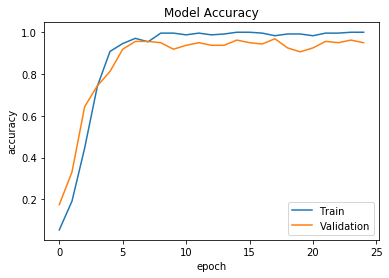

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

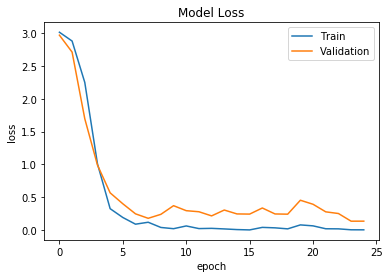

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Model Evaluation

In [23]:
model.evaluate(x=X_test,y=y_test)

160/160 [==============================] - 0s 1ms/step


[0.13687948249280452, 0.949999988079071]

#### Testing Model predictions with random images

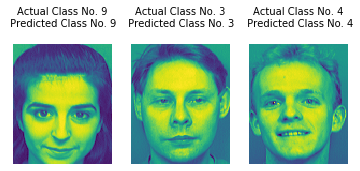

In [24]:
samples = np.random.randint(low=0, high=len(X_test)-1, size=3)
X_new = X_test[samples]
y_new = y_test[samples]
preds = model.predict(x=X_new)

fig, axs = plt.subplots(1,3)
for index, ax in enumerate(axs):
    ax.imshow(X_new[index].reshape(112,92))
    ax.set_title('Actual Class No. {}\n Predicted Class No. {}\n'.
                 format(y_new[index], np.argmax(preds[index])), 
                 fontdict={'size': 10})
    ax.axis('off')

plt.show()

#### Saving the the model

In [25]:
model.save("face_recognition")